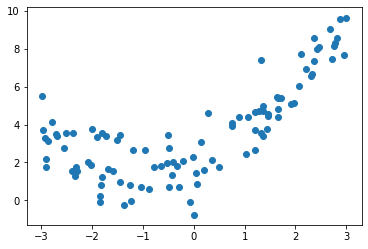

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x. reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [5]:
X_train.shape

(75, 1)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

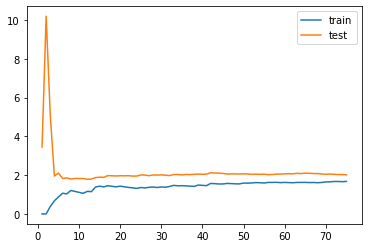

In [17]:
from math import sqrt

plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.legend()
plt.show()

在训练数据集上，误差逐渐升高。
刚开始，误差累积较快，到后面误差累积变慢。
在测试数据集上，刚开始误差很大，逐渐减小，减小到一定程度后达到相对稳定。
最终，训练误差与测试误差趋于大体相同。测试误差略高于训练误差。

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()

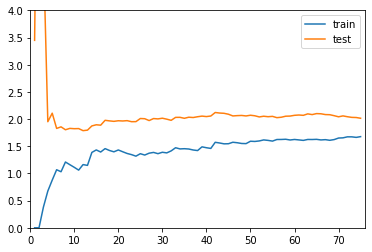

In [28]:
plot_learning_curve( LinearRegression(), X_train, X_test, y_train, y_test)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

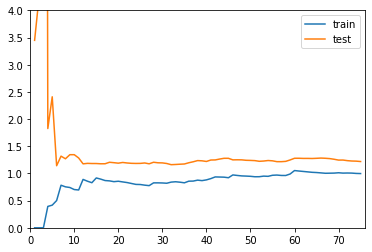

In [30]:
plot_learning_curve( PolynomialRegression(degree=2), X_train, X_test, y_train, y_test)

整体趋势与使用线性回归的图像是一致的。
区别在于，线性回归模型中训练误差和测试误差稳定在1.7左右
而2阶多项式回归模型中训练误差和测试误差稳定在1.0左右
这说明使用2阶多项式回归的结果是比较好的。

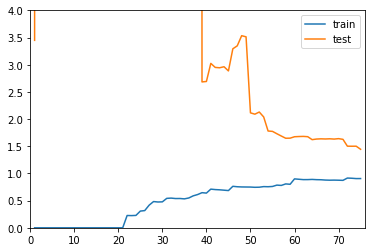

In [31]:
plot_learning_curve( PolynomialRegression(degree=20), X_train, X_test, y_train, y_test)

整体趋势仍然是train逐渐上升，test逐渐下降，最终趋于稳定。
在区别是，在train和test都比较稳定时，它们之间的差距是比较大。
这就说明模型虽然在训练数据集上拟合得非常好，但是在测试数据集上误差仍然很大。
这种情况通常就是过拟合。